# Adult Dataset

### Objective: Predict whether income exceeds $50K/yr based on census data. 

#### Importing libraries and dataset

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

#creates the dataframe
names = ["Age", "Workclass","Final Weight","Education","Education Number of Years","Marital-status","Occupation","Relationship","Race","Sex","Capital-gain","Capital-loss","Hours-per-week","Native-country", "Income"]
df = pd.read_csv("adult.data", names=names)
#combines the df with the information stored in the other data file
df2 = pd.read_csv("adult.test", names = names)
df = data = pd.concat([df,df2])
df.sample(15)

,Age,Workclass,Final Weight,Education,Education Number of Years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
7624,43,Federal-gov,203637,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,7298,0,40,United-States,>50K
1291,63,Self-emp-not-inc,795830,1st-4th,2,Widowed,Other-service,Unmarried,White,Female,0,0,30,El-Salvador,<=50K
30748,28,Private,119287,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,28,United-States,>50K
12822,18,Private,243240,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,37,United-States,<=50K
11066,34,Private,164190,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,38,United-States,>50K
7511,68,?,186163,1st-4th,2,Widowed,?,Unmarried,Black,Female,0,0,40,United-States,<=50K
12813,19,Private,125591,11th,7,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
32302,45,Local-gov,162187,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4584,41,Private,298161,Assoc-voc,11,Divorced,Adm-clerical,Own-child,White,Female,0,0,40,Cuba,<=50K
23263,27,Private,224849,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


#### Preprocessing the dataset

In [50]:
#strip all the column names
df.columns = df.columns.str.strip()
#selects all the series with strings
object_series = []
for series in df:
    if df[series].dtype == object:
        object_series.append(series)

#strips each variable
for series in object_series:
    df[series] = df[series].str.strip()



In [51]:
df.describe(include='all')

,Age,Workclass,Final Weight,Education,Education Number of Years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
#lets check for missing values
df.isna().any()

Age                          False
Workclass                    False
Final Weight                 False
Education                    False
Education Number of Years    False
Marital-status               False
Occupation                   False
Relationship                 False
Race                         False
Sex                          False
Capital-gain                 False
Capital-loss                 False
Hours-per-week               False
Native-country               False
Income                       False
dtype: bool

In [52]:
#the output shows no null values, however the dataset has missing values that are encoded with "?"
#lets check how many of those there are 
missing_data = 0
for row in df.values:
    if "?" in row:
        missing_data +=1
print(f"There are {missing_data} rows with missing values in the dataset")


There are 3620 rows with missing values in the dataset


As you can see there are 3620 cases with missing data

In [53]:
for series in names:
    missing_count = df[series].isin(['?']).sum(axis = 0)
    missing_percentage = round((missing_count / df.shape[0]) * 100, 2)
    if missing_count > 0:
        print(f"The percentage of missing values in the {series} attribute is {missing_percentage}%") 
    

The percentage of missing values in the Workclass attribute is 5.73%
The percentage of missing values in the Occupation attribute is 5.75%
The percentage of missing values in the Native-country attribute is 1.75%


The rest of the attributes did not have any missing data. As there is no straight forward way to encode missing values, let us remove them.

In [54]:
#lets get rid of the missing data
df.replace({"?": None}, inplace= True)
df.dropna(inplace = True)
number_of_rows = df.shape[0]
print(f"There are {number_of_rows} cases with no missing data")

There are 45222 cases with no missing data


In [55]:
#finally, lets check for duplicates in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows in the data.')

There are 47 duplicate rows in the data.


There are 47 duplicate rows, lets drop them

In [56]:
df = df.drop_duplicates()
print(f'After dubplicates were removed we are left with {df.shape[0]} cases.')

After dubplicates were removed we are left with 45175 cases.


Lets covert the final weight into the percentage of the total number of cases that this row represents.

In [57]:
#find the total number of cases
total = df["Final Weight"].sum()
#convert the final weight into a fraction of the total number of cases
df["Final Weight"] = df["Final Weight"].div(total)
df


c:\users\lenovo\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Age,Workclass,Final Weight,Education,Education Number of Years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,0.000009,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,0.000010,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,0.000025,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,0.000027,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,0.000039,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,0.000029,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
16276,39,Private,0.000025,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16278,38,Private,0.000044,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,0.000010,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Exploratory Data Analsyis (EDA)

In order to check that there are no mislabeled cases and determine the skewness of data, let us visualise each attribute with a frequency table.

<=50K    33973
>50K     11202
Name: Income, dtype: int64


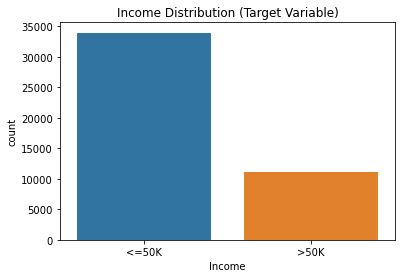

In [58]:
#lets plot the income
ax = sns.countplot(x="Income", data=df)
ax.set_title('Income Distribution (Target Variable)')
print(df.Income.value_counts())

From the graph above, it is clear that the target group has a skewed distribution. 

Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: Workclass, dtype: int64


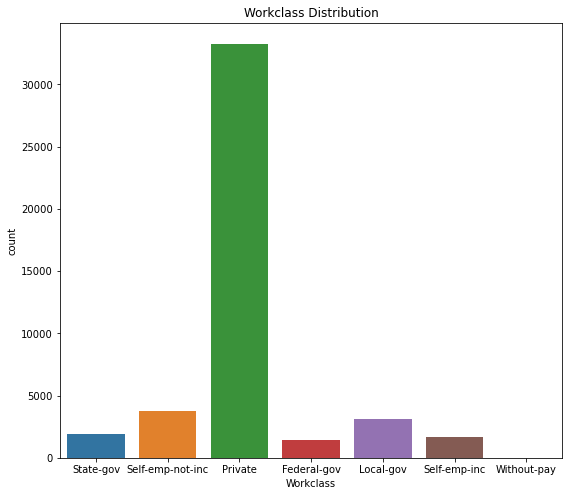

In [59]:
plt.figure(figsize=(9,8))
ax = sns.countplot(x="Workclass", data=df)
ax.set_title('Workclass Distribution')
print(df.Workclass.value_counts())

Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: Workclass, dtype: int64


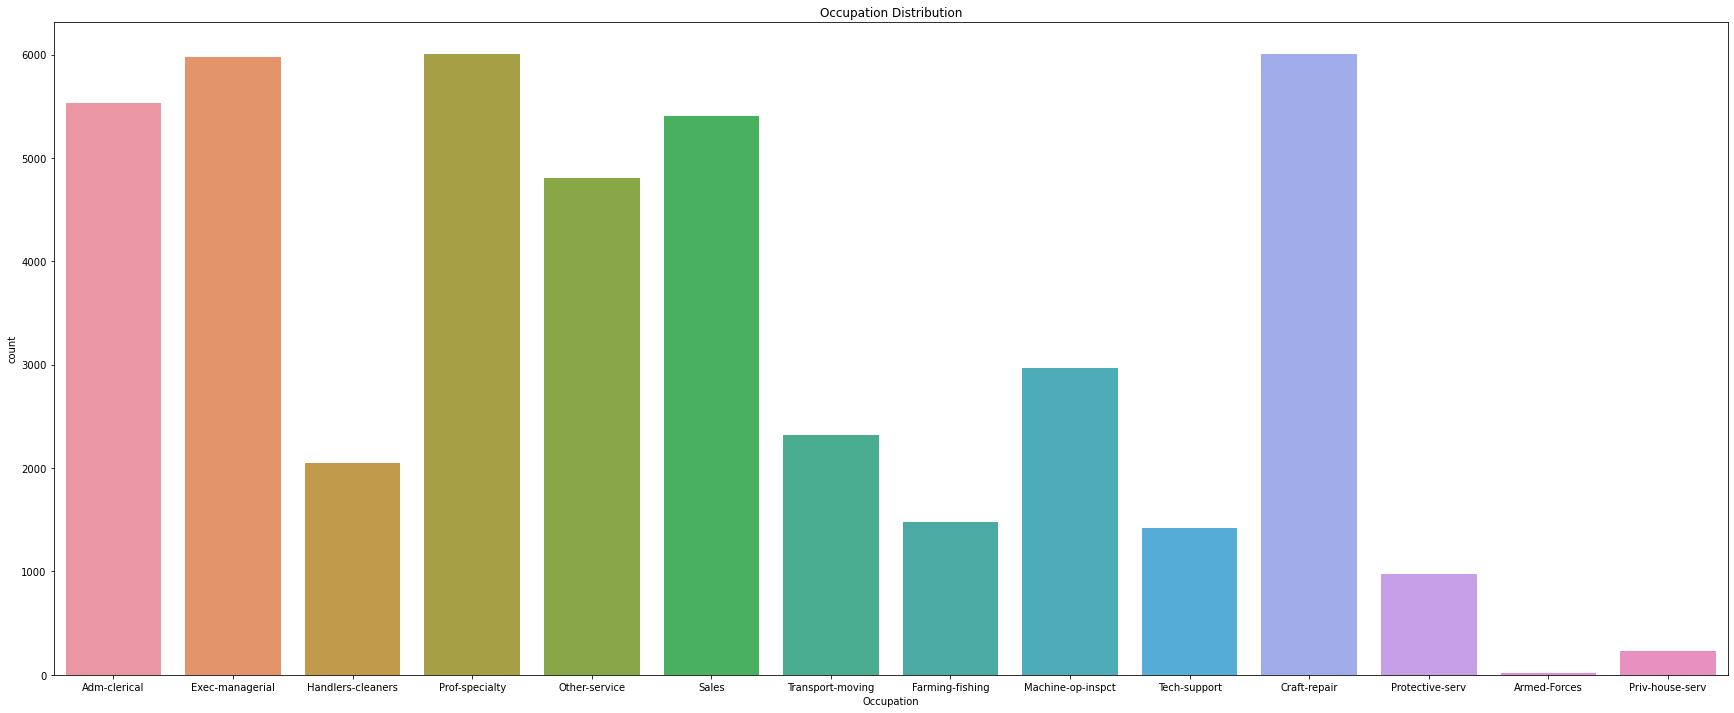

In [60]:
plt.figure(figsize=(30,12))
ax = sns.countplot(x="Occupation", data=df,)
ax.set_title('Occupation Distribution')
print(df.Workclass.value_counts())

Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: Workclass, dtype: int64


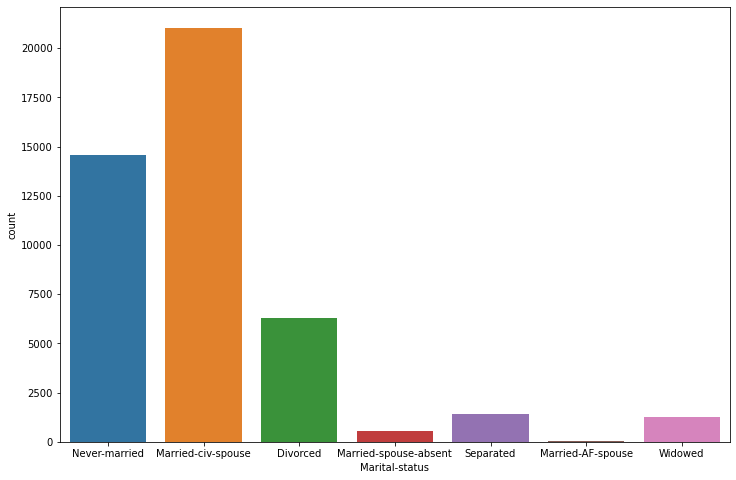

In [61]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Marital-status", data=df,)
print(df.Workclass.value_counts())

Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: Workclass, dtype: int64


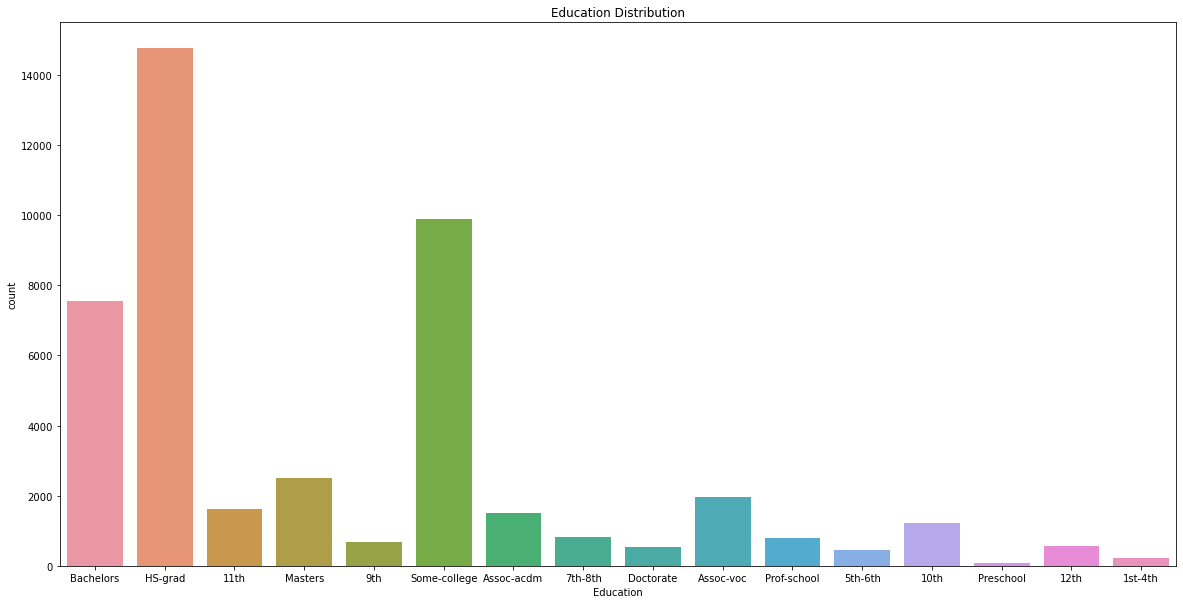

In [62]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Education", data=df,)
ax.set_title('Education Distribution')
print(df.Workclass.value_counts())

Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: Workclass, dtype: int64


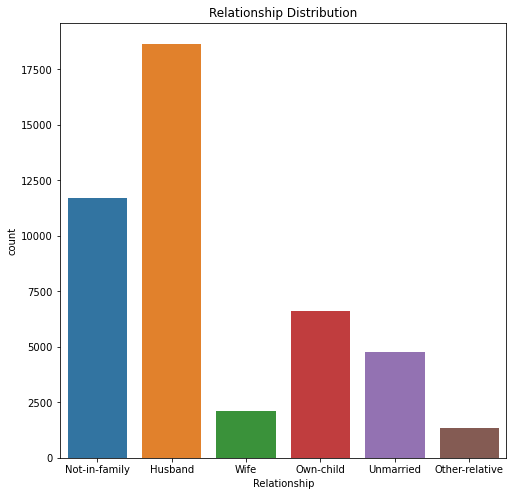

In [63]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x="Relationship", data=df,)
ax.set_title('Relationship Distribution')
print(df.Workclass.value_counts())

Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: Workclass, dtype: int64


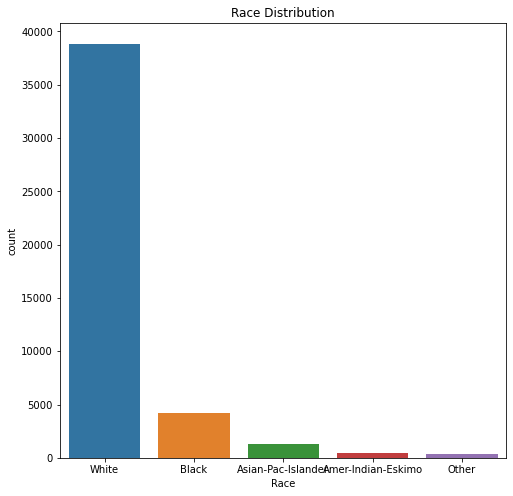

In [64]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x="Race", data=df,)
ax.set_title('Race Distribution')
print(df.Workclass.value_counts())

Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: Workclass, dtype: int64


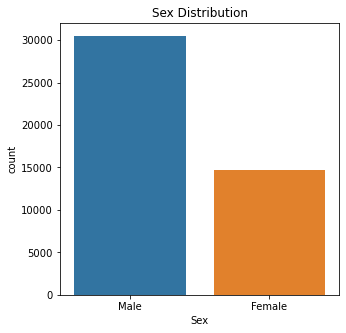

In [65]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="Sex", data=df,)
ax.set_title('Sex Distribution')
print(df.Workclass.value_counts())

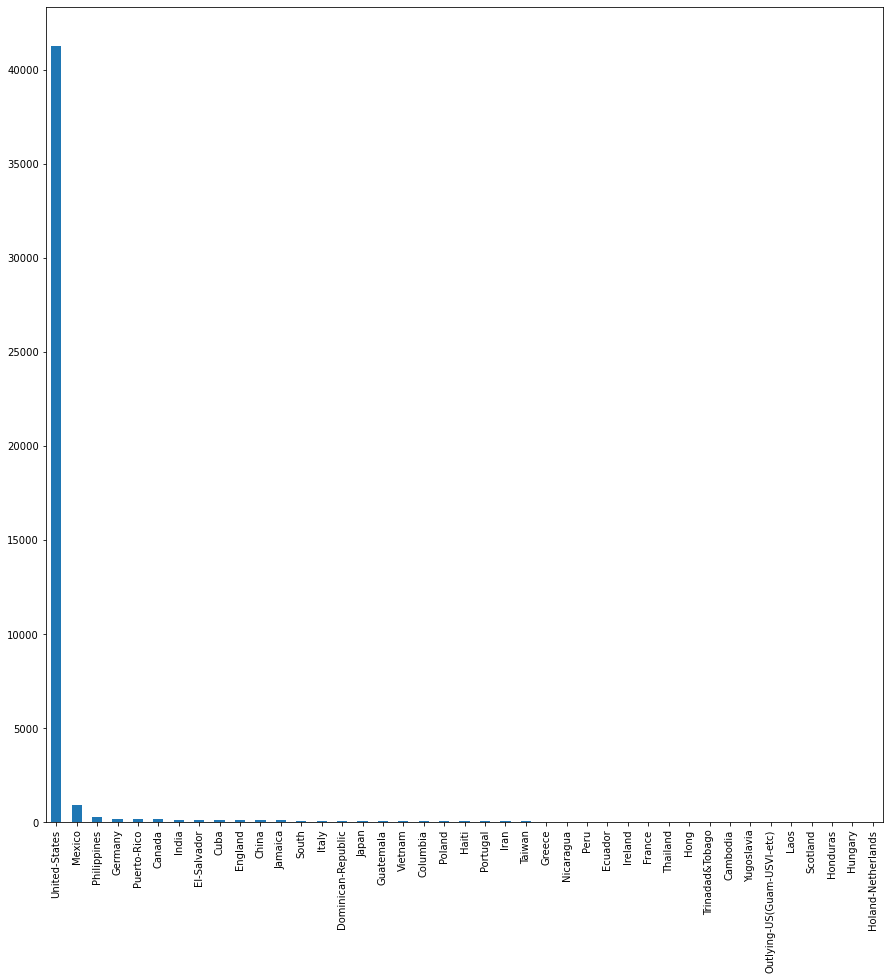

In [66]:
#plots home countries
ax = data['Native-country'].value_counts().plot(kind = 'bar', figsize = (15,15))

c:\users\lenovo\anaconda3\envs\geospatial\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


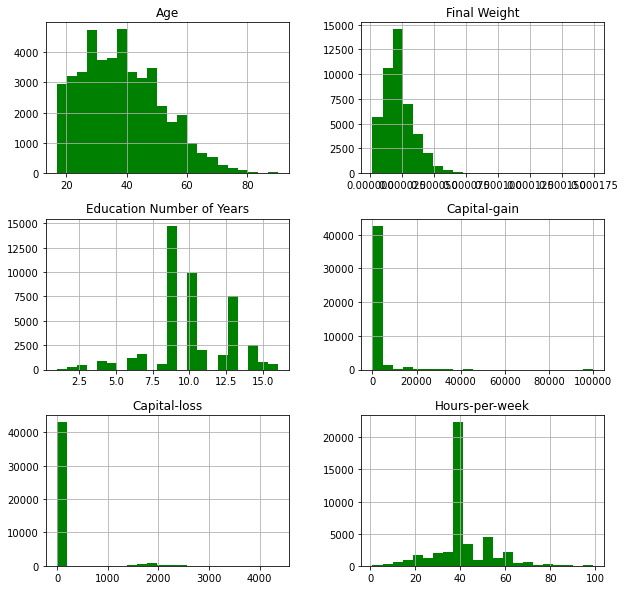

In [67]:
df.hist(figsize = (10,10), bins= 22, color = 'green')
plt.show()

### Bivariate Analysis using Box Plots 

#### a. Relationship between Income and Age

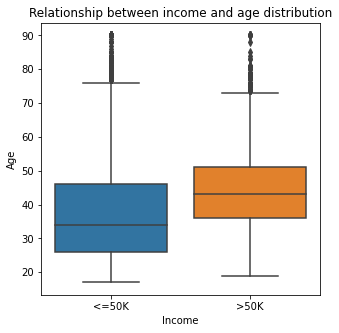

In [68]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(x="Income",y="Age",data=df)
ax.set_title('Relationship between income and age distribution')
plt.show()

Income group <=50k (class 0) has a median age of ~ 34 years whereas the income group >50k (Class 1) has a median age of ~42years.  

#### b. Relationship between Income and Captial-gain

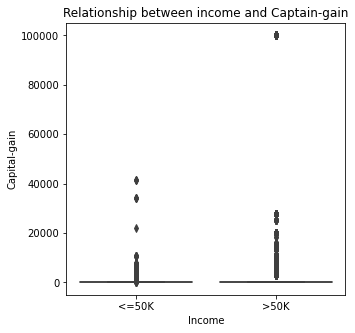

In [69]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(x="Income", y="Capital-gain", data=df)
ax.set_title('Relationship between income and Captain-gain')
plt.show()

Maximum of the capital gains value is concentrated at 0 for both the income group 

#### c. Relationship between Income and Capital-Loss

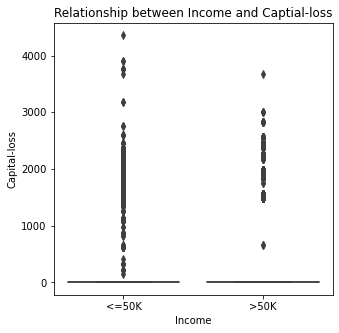

In [70]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(x="Income", y="Capital-loss", data=df)
ax.set_title('Relationship between Income and Captial-loss')
plt.show()

The result of the above box plot is quite similiar to the boxplot between Captial-Gain and income as most of the values are accumalted on 0.

# Bivariate Analaysis using histrograms

#### a. Comparing Income across Workclass

Text(0.5, 1.0, 'Compairing number of people in both income groups across different workclass')

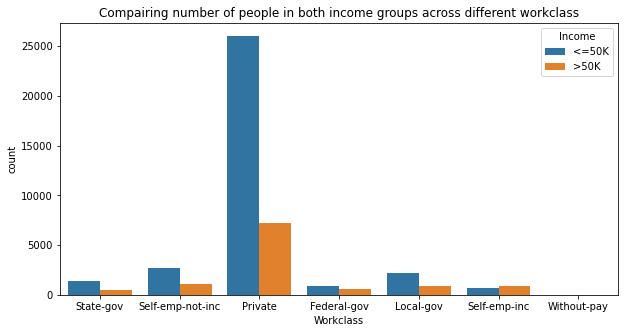

In [71]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='Workclass',hue ='Income',data=df).set_title("Compairing number of people in both income groups across different workclass")

In all the workclasses, the number of people earning <=50k is more than those having income more than 50k. From the figure above, it can also be concluded that data seems to mainly consist private employees 

#### b. Compairing Income across different races and sex

<Figure size 1440x360 with 0 Axes>

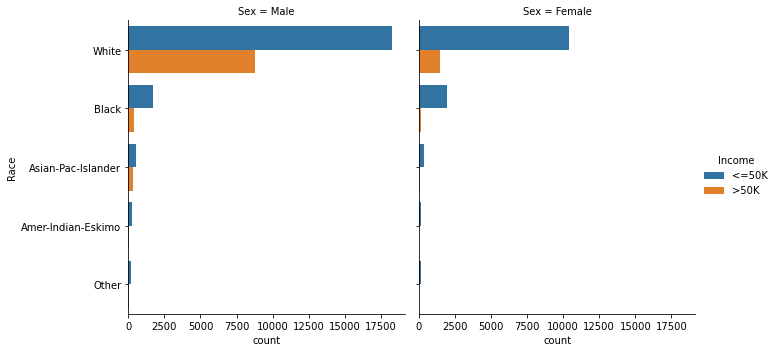

In [72]:
plt.figure(figsize=(20,5))
sns.catplot(y="Race", hue="Income", kind="count",col="Sex", data=df);

From the graph aboce, it is quite evident that males in sex and whites in race has the maximum number of  people with income more thamn 50k.

#### Converting categorical variables 

In [73]:
#lets recode bi-variate variables into binary
#converts sex
sex_dict = {'Male': 0, 'Female': 1}
df["Sex"] = df["Sex"].map(sex_dict)
pd.to_numeric(df['Sex'])

#convert income
income_dict = {'<=50K' : 0, '>50K' : 1}
df['Income']= df["Income"].map(income_dict)
pd.to_numeric(df['Income'])

#converts marriage
marrige_dict = {'Divorced' : 0 ,'Married-AF-spouse' : 1,'Married-civ-spouse' : 1,'Married-spouse-absent' : 1, 'Never-married' : 0,'Separated' : 0,'Widowed' : 0}
df["Marital-status"] = df["Marital-status"].map(marrige_dict)
pd.to_numeric(df['Income'])
education_dict = {'Bachelors' : 13, 'Prof-school' : 15, 'HS-grad' :9, '5th-6th' : 3, '12th' : 8, '9th' : 5, 'Doctorate' : 16, '11th' : 7, 'Some-college' : 10, 'Assoc-voc' : 11, 'Preschool' : 1, '1st-4th' : 2, 'Assoc-acdm' : 12, 'Masters' : 14, '7th-8th' : 4, '10th' : 6}
df['Education']= df["Education"].map(education_dict)
pd.to_numeric(df["Education"])

#As native country is dominated by the United States, let us convert the attibiute into a bivariate variable, where 0 represents the US and 1 respresents any other country.
country_dict = {}
for country in df['Native-country'].values:
    if country == 'United-States':
        country_dict[country] = 0
    else:
        country_dict[country] = 1
df["Native-country"] = df["Native-country"].map(country_dict)
pd.to_numeric(df["Education"])
df.dtypes



c:\users\lenovo\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\lenovo\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\lenovo\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Age                            int64
Workclass                     object
Final Weight                 float64
Education                      int64
Education Number of Years      int64
Marital-status                 int64
Occupation                    object
Relationship                  object
Race                          object
Sex                            int64
Capital-gain                   int64
Capital-loss                   int64
Hours-per-week                 int64
Native-country                 int64
Income                         int64
dtype: object

Let's group occupation in accordance to the ISCO international standards in order to reduce the number of variables in hot one encodings.
https://ilostat.ilo.org/resources/concepts-and-definitions/classification-occupation/

In [74]:
occupation_dict = {
    'Adm-clerical' : 'Level 3',
    'Exec-managerial' : 'Level 4',
    'Handlers-cleaners': 'Level 1',
    'Prof-specialty' :'Level 4',
    'Other-service' : 'Level 3',
    'Sales' : 'Level 3',
    'Transport-moving': 'Level 1',
    'Farming-fishing' : 'Level 2',
    'Machine-op-inspct' : 'Level 2',
    'Tech-support': 'Level 4',
    'Craft-repair' : 'Level 2', 
    'Protective-serv': 'Level 2',
    'Armed-Forces' : 'Level 0',
    'Priv-house-serv' : "Level 1"}
df["Occupation"] = df["Occupation"].map(occupation_dict)


c:\users\lenovo\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


## One-Hot Encoder

Lets group other attributes in order the reduce the number of variables after hot one encoding. 

In [75]:

workclass_dict = {'Federal-gov' : 'Government', 'Local-gov' :"Government" , 'Private' : 'Private', 'Self-emp-inc': "Self-Employed",'Self-emp-not-inc': "Self-Employed", 'State-gov' : 'Government', 'Without-pay' : 'Other'}
df["Workclass"] = df["Workclass"].map(workclass_dict)
relationship_dict = {'Husband' : 'Husband', 'Not-in-family': 'Not-in-Family', 'Other-relative' : 'Other', 'Own-child': 'Child', 'Unmarried': 'Not-in-family', 'Wife' : 'Wife'}
df["Relationship"] = df["Relationship"].map(relationship_dict)

c:\users\lenovo\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\lenovo\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [171]:
# #lets convert capital gain and capital loss into net capital gain
# df['Net-capital-gain'] = df['Capital-gain'] - df['Capital-loss']
# df = df.drop(columns=['Capital-gain', 'Capital-loss'])
# df['Net-capital-gain'].hist(figsize=(5,5))

## Correlation Matrix

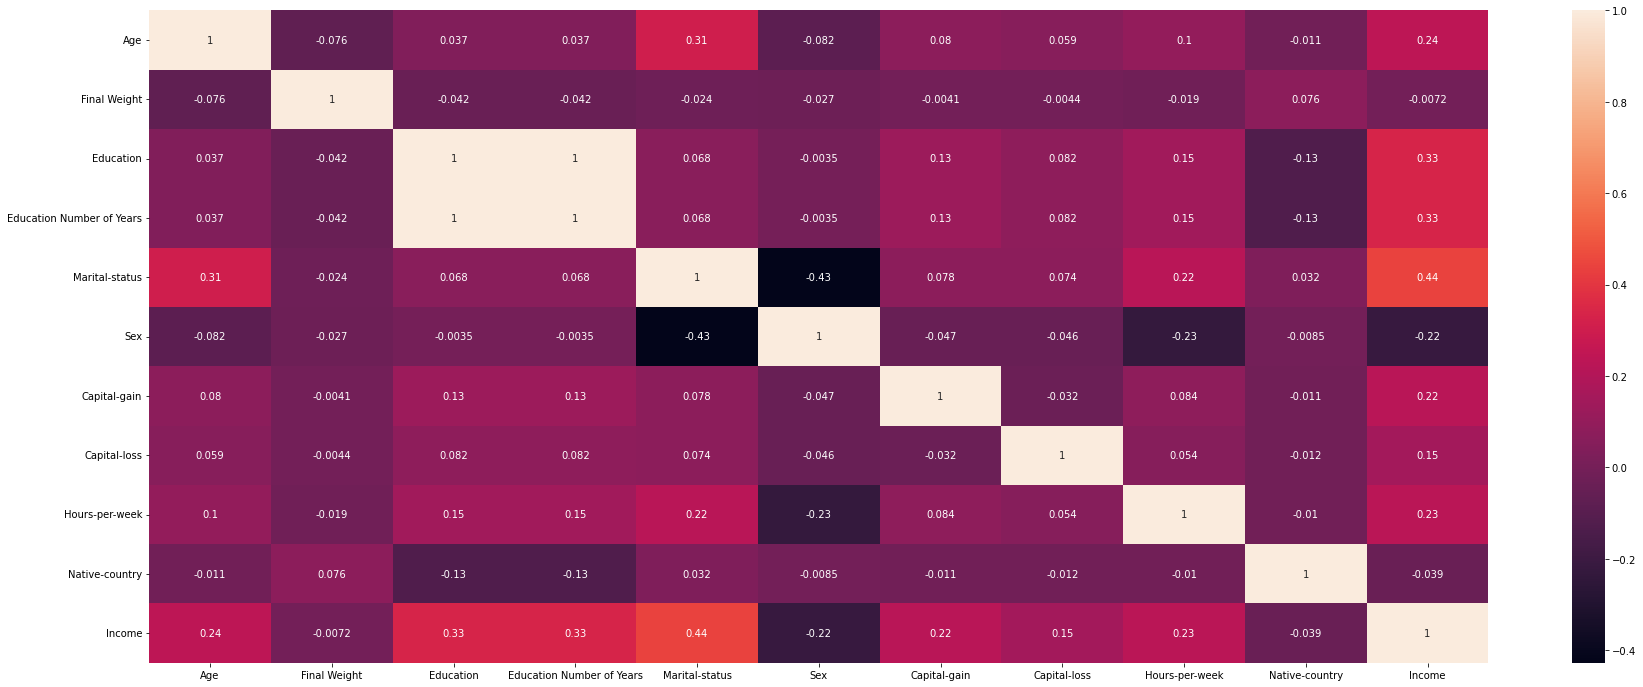

In [76]:
#creates a correlation matrix for the numerical variables
corrMatrix = df.corr()
plt.figure(figsize=(30,12))
sns.heatmap(corrMatrix, annot=True)
plt.show()

The correlation matrix shows a 1:1 correlation between the  Education Number of Yeats and Education attributes. In addition, the correlation those variables have with the rest of the attributes is also equivalent. As such it is reasonable to assume that the education number of years was not recorded and instead was estimated in a similar way to how we have done so. As such, we decided to drop it.

In [77]:
df = df.drop(columns='Education Number of Years')
df

,Age,Workclass,Final Weight,Education,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,Government,0.000009,13,0,Level 3,Not-in-Family,White,0,2174,0,40,0,0
1,50,Self-Employed,0.000010,13,1,Level 4,Husband,White,0,0,0,13,0,0
2,38,Private,0.000025,9,0,Level 1,Not-in-Family,White,0,0,0,40,0,0
3,53,Private,0.000027,7,1,Level 1,Husband,Black,0,0,0,40,0,0
4,28,Private,0.000039,13,1,Level 4,Wife,Black,1,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,0.000029,13,0,Level 4,Child,White,0,0,0,40,0,0
16276,39,Private,0.000025,13,0,Level 4,Not-in-Family,White,1,0,0,36,0,0
16278,38,Private,0.000044,13,1,Level 4,Husband,White,0,0,0,50,0,0
16279,44,Private,0.000010,13,0,Level 3,Child,Asian-Pac-Islander,0,5455,0,40,0,0


Let's hot ecode categorical variables:

In [78]:
occupation_econoding = pd.get_dummies(df['Occupation'], prefix='Occupation:')
df = pd.concat([df,occupation_econoding],axis=1)
df = df.drop(columns='Occupation')

race_encoding = pd.get_dummies(df['Race'], prefix='Race:')
df = pd.concat([df,race_encoding],axis=1)
df = df.drop(columns='Race')

workclass_encoding = pd.get_dummies(df['Workclass'], prefix='Workclass:')
df = pd.concat([df,workclass_encoding],axis=1)
df = df.drop(columns='Workclass')

relationship_enconding = pd.get_dummies(df['Relationship'], prefix='Relationship:')
df = pd.concat([df,relationship_enconding],axis=1)
df = df.drop(columns='Relationship')

df


,Age,Final Weight,Education,Marital-status,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income,...,Workclass:_Government,Workclass:_Other,Workclass:_Private,Workclass:_Self-Employed,Relationship:_Child,Relationship:_Husband,Relationship:_Not-in-Family,Relationship:_Not-in-family,Relationship:_Other,Relationship:_Wife
0,39,0.000009,13,0,0,2174,0,40,0,0,...,1,0,0,0,0,0,1,0,0,0
1,50,0.000010,13,1,0,0,0,13,0,0,...,0,0,0,1,0,1,0,0,0,0
2,38,0.000025,9,0,0,0,0,40,0,0,...,0,0,1,0,0,0,1,0,0,0
3,53,0.000027,7,1,0,0,0,40,0,0,...,0,0,1,0,0,1,0,0,0,0
4,28,0.000039,13,1,1,0,0,40,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,0.000029,13,0,0,0,0,40,0,0,...,0,0,1,0,1,0,0,0,0,0
16276,39,0.000025,13,0,1,0,0,36,0,0,...,0,0,1,0,0,0,1,0,0,0
16278,38,0.000044,13,1,0,0,0,50,0,0,...,0,0,1,0,0,1,0,0,0,0
16279,44,0.000010,13,0,0,5455,0,40,0,0,...,0,0,1,0,1,0,0,0,0,0


## Spliting the Dataset

Let us split the dataset into training, testing and validation

In [79]:
train, test = train_test_split(df, test_size=0.2, stratify= df['Income'])
train.to_csv('train.csv', encoding='utf-8', index=False)
test.to_csv('test.csv', encoding='utf-8', index=False)